<a href="https://colab.research.google.com/github/leeyeajin/BIGDATA/blob/main/10%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

!pip install koreanize_matplotlib
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.0 MB/s eta 0:00:00


# 1. 고객별 데이터 전처리

In [42]:
# 데이터 불러오기
customer_data = pd.read_csv("customer.csv")

# 처음 5개 행 확인
print(customer_data.head())

# 데이터 정보 확인
print(customer_data.info())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("\n고객별 데이터 출력하기:")
    display(customer_data.describe(include='all').T)

        고객ID 성별  연령         거주지역
0  Q05910452  F  29  서울 서초구 서초4동
1  Q00509389  M  20   경기 화성시 봉담읍
2  Q59112261  M  30  서울 서초구 서초4동
3  Q38120745  F  28   인천 중구 항동7가
4  Q18530082  F  42    강원 인제군 북면
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    5000 non-null   object
 1   성별      5000 non-null   object
 2   연령      5000 non-null   int64 
 3   거주지역    4985 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB
None

고객별 데이터 출력하기:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
고객ID,5000,5000,Q05910452,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
성별,5000,2,F,3906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
연령,5000.0,NaN,NaN,NaN,44.2812,12.815529,20.0,34.0,44.0,53.0,79.0
거주지역,4985,899,서울 서초구 잠원동,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1-1. 고객별 기술 통계

In [17]:
customer_data.describe(include = 'O')

,고객ID,성별,거주지역
count,5000,5000,4985
unique,5000,2,899
top,Q05910452,F,서울 서초구 잠원동
freq,1,3906,404


In [40]:
customer_data.isnull().sum()

고객ID     0
성별       0
연령       0
거주지역    15
dtype: int64

In [19]:
customer_data.isnull().mean()

고객ID    0.000
성별      0.000
연령      0.000
거주지역    0.003
dtype: float64

<Axes: >

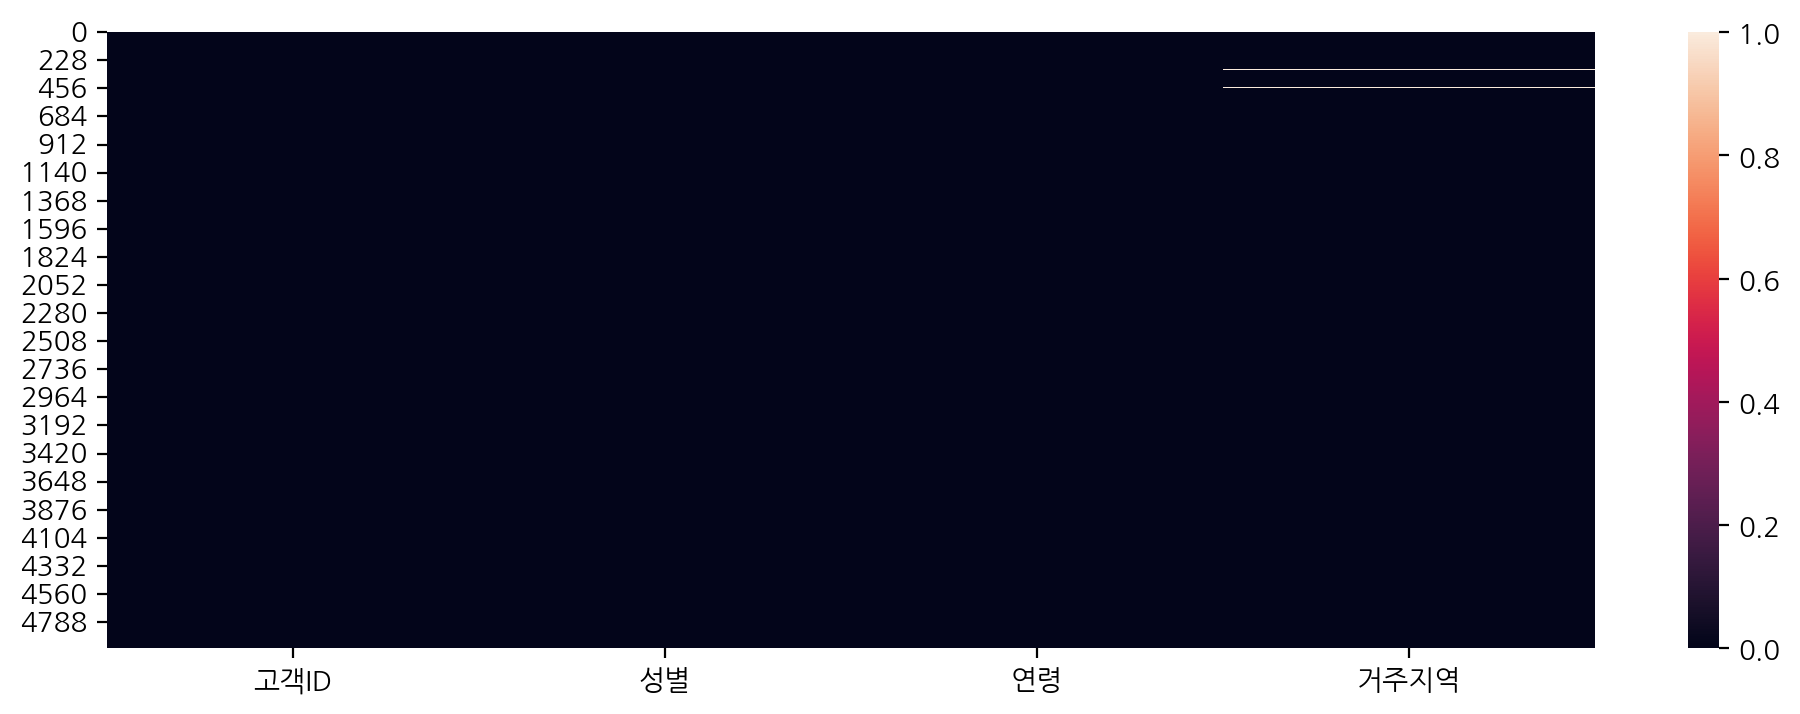

In [21]:
plt.figure(figsize=(12, 4))
sns.heatmap(customer_data.isnull())

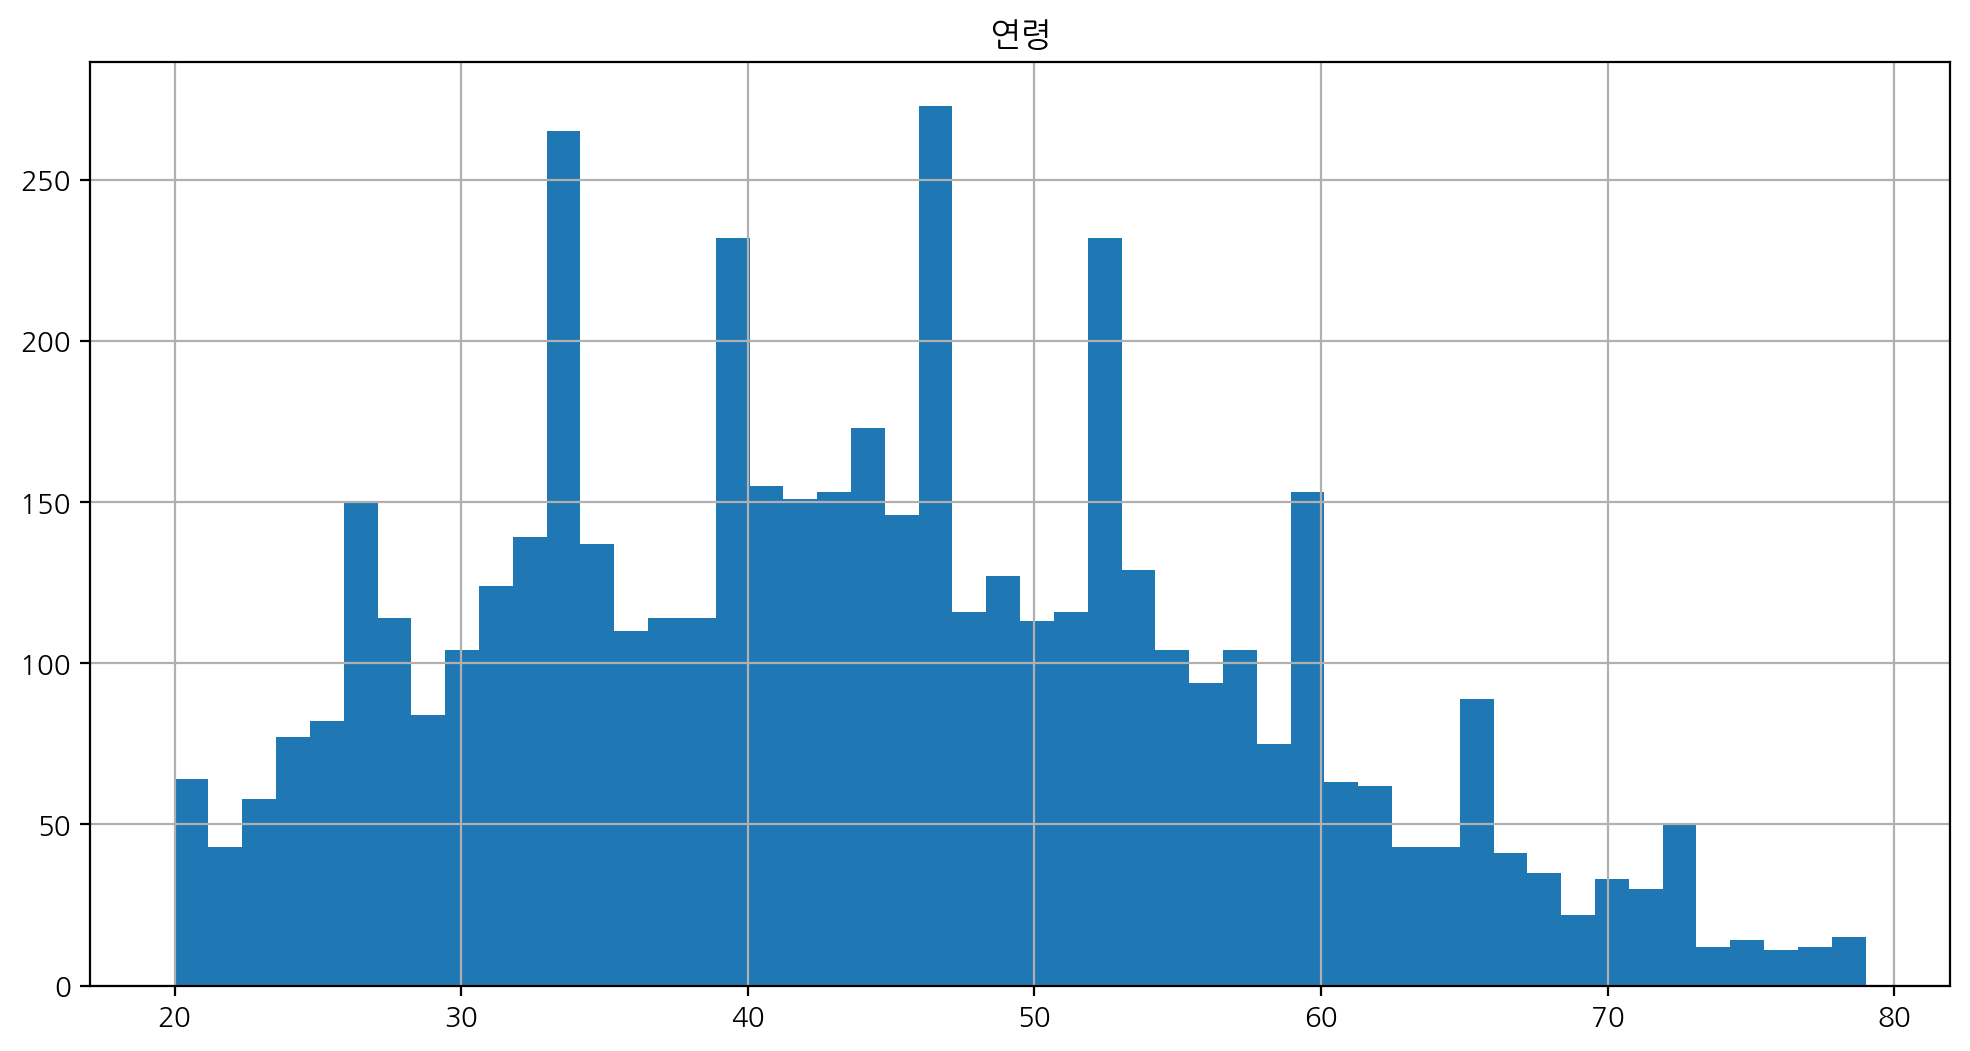

In [22]:
customer_data.hist(bins = 50, figsize = (12, 6));

# 2. Sales 데이터 전처리

In [24]:
import pandas as pd

# sales.csv 불러오기
sales_data = pd.read_csv("sales.csv")

# 처음 5개 행 확인
print("\n[Sales 데이터]")
print(sales_data.head())

# 데이터 정보 확인
print("\n데이터 정보 확인:")
print(sales_data.info())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("\nsales 데이터 출력하기:")
    display(sales_data.describe(include='all').T)


[Sales 데이터]
        고객ID   거래식별ID 점포ID      거래일자  거래시간대 상품대분류명 상품중분류명  구매건수  구매금액
0  Q00027726  A000361   AA  20140403     21    면과자     라면     2   780
1  Q00027726  A000361   AA  20140403     21    면과자  쿠키케이크     1  1600
2  Q00027726  A000363   AA  20140403     21    델리카   간편간식     1  6990
3  Q00027726  A000363   AA  20140403     21   일반식품   즉석식품     1  2500
4  Q00027726  A000364   AA  20140403     21    면과자      빵     1  1000

데이터 정보 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57198 entries, 0 to 57197
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    57198 non-null  object
 1   거래식별ID  57198 non-null  object
 2   점포ID    57198 non-null  object
 3   거래일자    57198 non-null  int64 
 4   거래시간대   57198 non-null  int64 
 5   상품대분류명  57198 non-null  object
 6   상품중분류명  57198 non-null  object
 7   구매건수    57198 non-null  int64 
 8   구매금액    57198 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB
N

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
고객ID,57198,4198,Q64893845,224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
거래식별ID,57198,33908,A053991,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
점포ID,57198,4,AA,23154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
거래일자,57198.0,NaN,NaN,NaN,20140680.567223,175.991004,20140401.0,20140520.0,20140706.0,20140819.0,20141007.0
거래시간대,57198.0,NaN,NaN,NaN,16.40199,3.311077,10.0,14.0,17.0,19.0,22.0
상품대분류명,57198,14,야채,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
상품중분류명,57198,84,음료,3043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
구매건수,57198.0,NaN,NaN,NaN,1.373929,1.45313,1.0,1.0,1.0,1.0,48.0
구매금액,57198.0,NaN,NaN,NaN,4923.347512,6169.269215,40.0,1950.0,3250.0,5980.0,290000.0


# 2-1. Sales 기술통계

In [25]:
sales_data.describe(include = 'O')

,고객ID,거래식별ID,점포ID,상품대분류명,상품중분류명
count,57198,57198,57198,57198,57198
unique,4198,33908,4,14,84
top,Q64893845,A053991,AA,야채,음료
freq,224,12,23154,11758,3043


In [26]:
sales_data.isnull().sum()

고객ID      0
거래식별ID    0
점포ID      0
거래일자      0
거래시간대     0
상품대분류명    0
상품중분류명    0
구매건수      0
구매금액      0
dtype: int64

In [27]:
sales_data.isnull().mean()

고객ID      0.0
거래식별ID    0.0
점포ID      0.0
거래일자      0.0
거래시간대     0.0
상품대분류명    0.0
상품중분류명    0.0
구매건수      0.0
구매금액      0.0
dtype: float64

<Axes: >

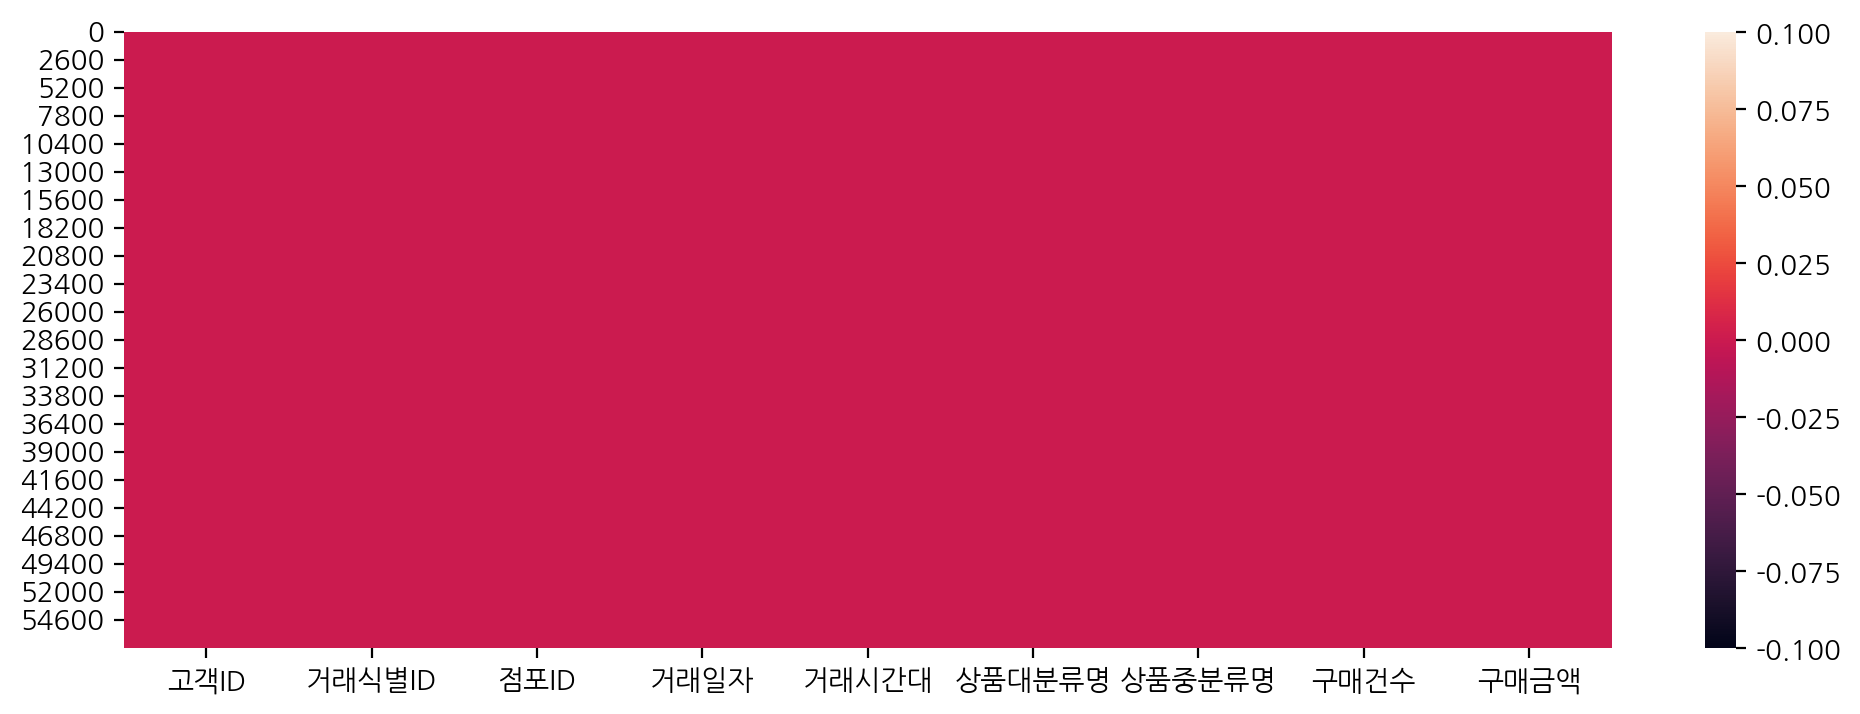

In [28]:
plt.figure(figsize=(12, 4))
sns.heatmap(sales_data.isnull())

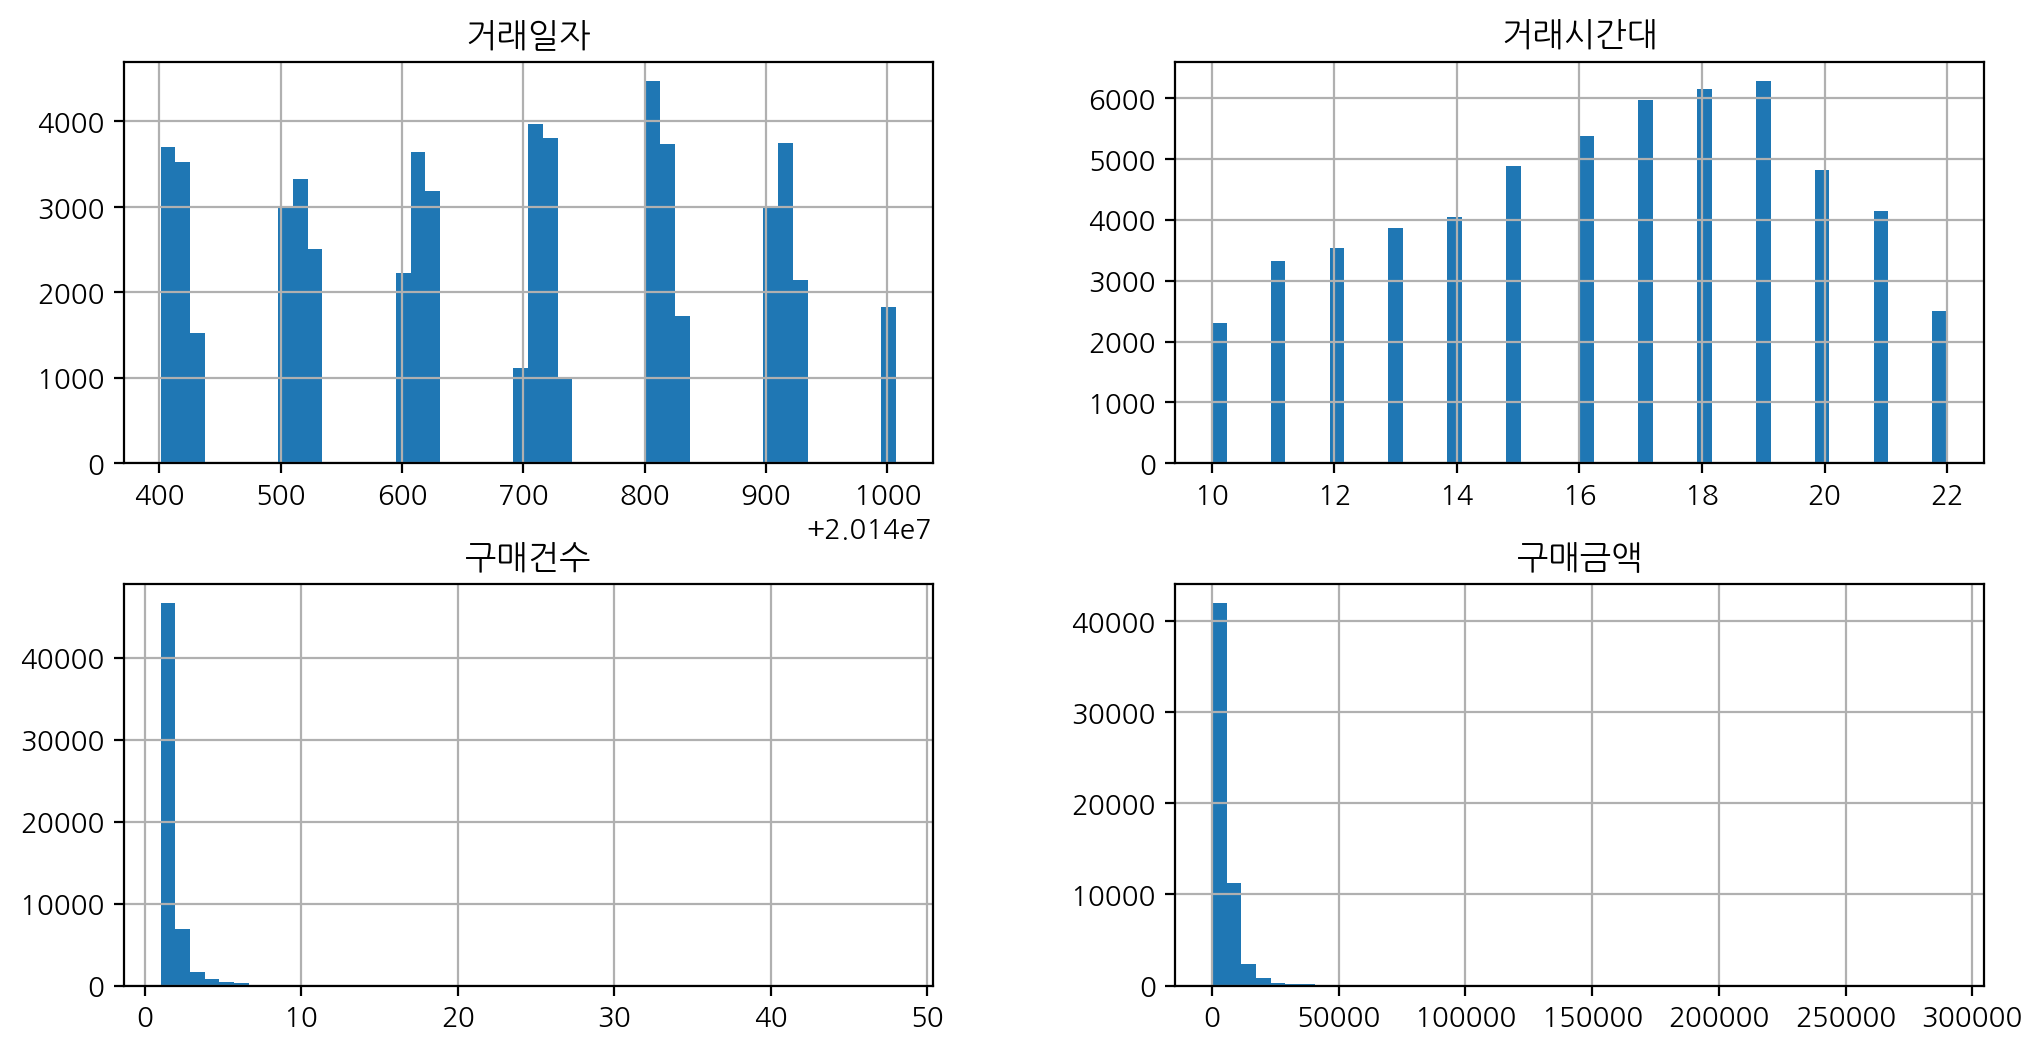

In [29]:
sales_data.hist(bins = 50, figsize = (12, 6));

# 3. 가게 데이터 전처리

In [13]:
# store.csv 불러오기
store_data = pd.read_csv("store.csv")

# 처음 5개 행 확인
print("\n[Store 데이터]")
print(store_data.head())

# 데이터 정보 확인
print("\n데이터 정보 확인:")
print(store_data.info())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print("\n가게 데이터 출력하기:")
    display(store_data.describe(include='all').T)


[Store 데이터]
        고객ID 가맹점ID      거래일자    구매금액  적립포인트  사용포인트
0  Q91325491     D  20140703    6800     68      0
1  Q91325491     D  20140812    1000     10      0
2  Q02441390     A  20140414  196000    312      0
3  Q02441390     A  20140418  330250   1651      0
4  Q02441390     A  20140522  121500    607      0

데이터 정보 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26044 entries, 0 to 26043
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    26044 non-null  object
 1   가맹점ID   26044 non-null  object
 2   거래일자    26044 non-null  int64 
 3   구매금액    26044 non-null  int64 
 4   적립포인트   26044 non-null  int64 
 5   사용포인트   26044 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ MB
None

가게 데이터 출력하기:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
고객ID,26044,3429,Q55478502,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가맹점ID,26044,5,A,9988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
거래일자,26044.0,NaN,NaN,NaN,20140668.822186,166.764069,20140401.0,20140518.0,20140703.0,20140815.0,20140930.0
구매금액,26044.0,NaN,NaN,NaN,46031.720511,69047.851628,400.0,5900.0,16100.0,54450.0,399000.0
적립포인트,26044.0,NaN,NaN,NaN,163.970934,448.852794,-25.0,21.0,54.0,131.0,17560.0
사용포인트,26044.0,NaN,NaN,NaN,332.634388,4583.568018,-91100.0,0.0,0.0,0.0,344450.0


# 3-1. 가게 기술 통계

In [30]:
store_data.describe(include = 'O')

,고객ID,가맹점ID
count,26044,26044
unique,3429,5
top,Q55478502,A
freq,116,9988


In [31]:
store_data.isnull().sum()

고객ID     0
가맹점ID    0
거래일자     0
구매금액     0
적립포인트    0
사용포인트    0
dtype: int64

In [32]:
store_data.isnull().mean()

고객ID     0.0
가맹점ID    0.0
거래일자     0.0
구매금액     0.0
적립포인트    0.0
사용포인트    0.0
dtype: float64

<Axes: >

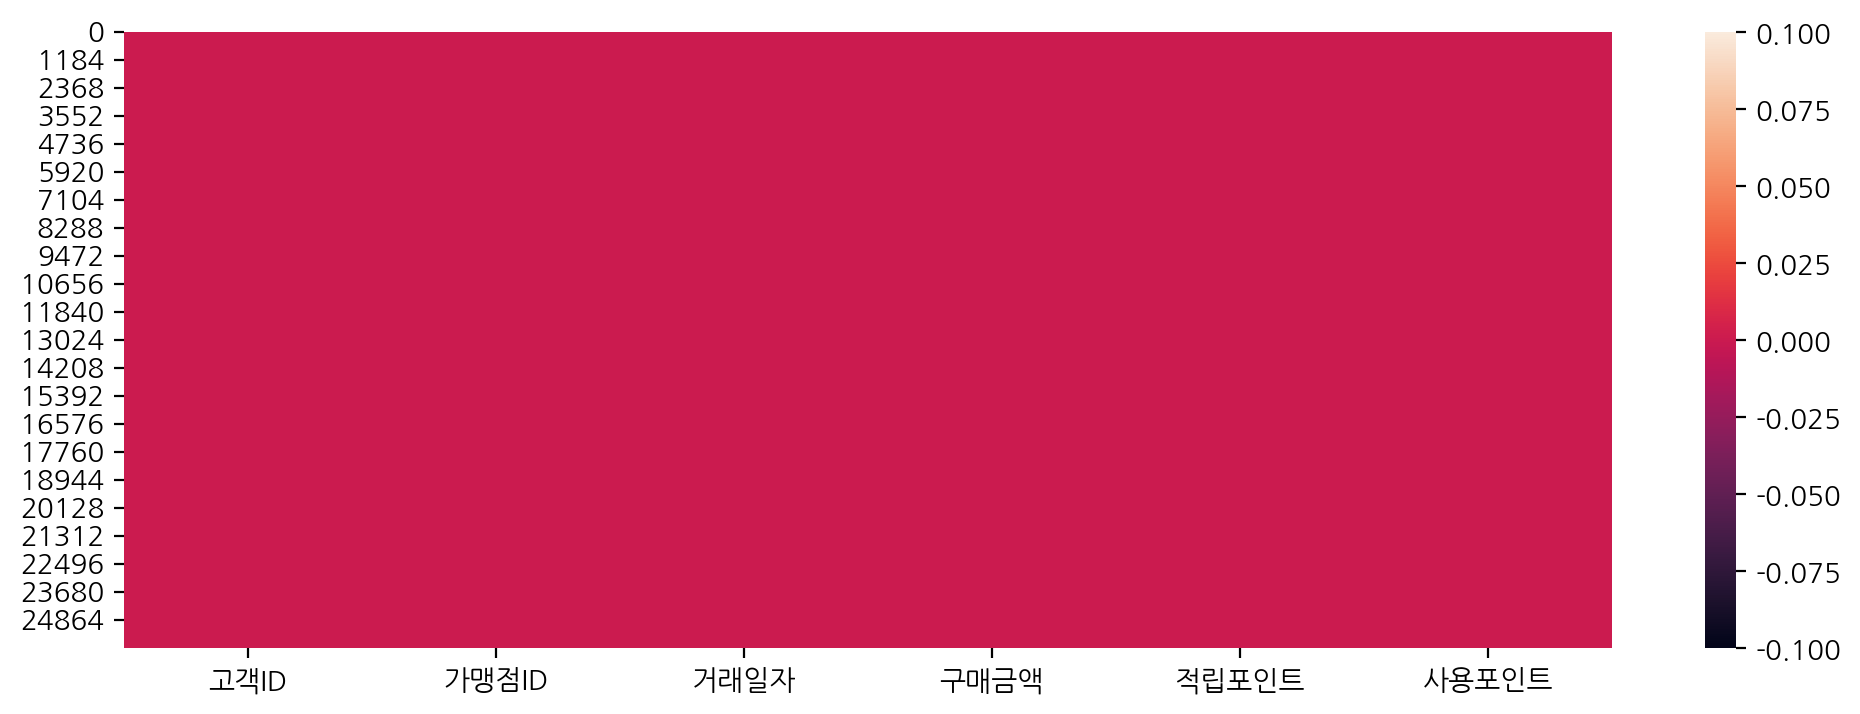

In [33]:
plt.figure(figsize=(12, 4))
sns.heatmap(store_data.isnull())

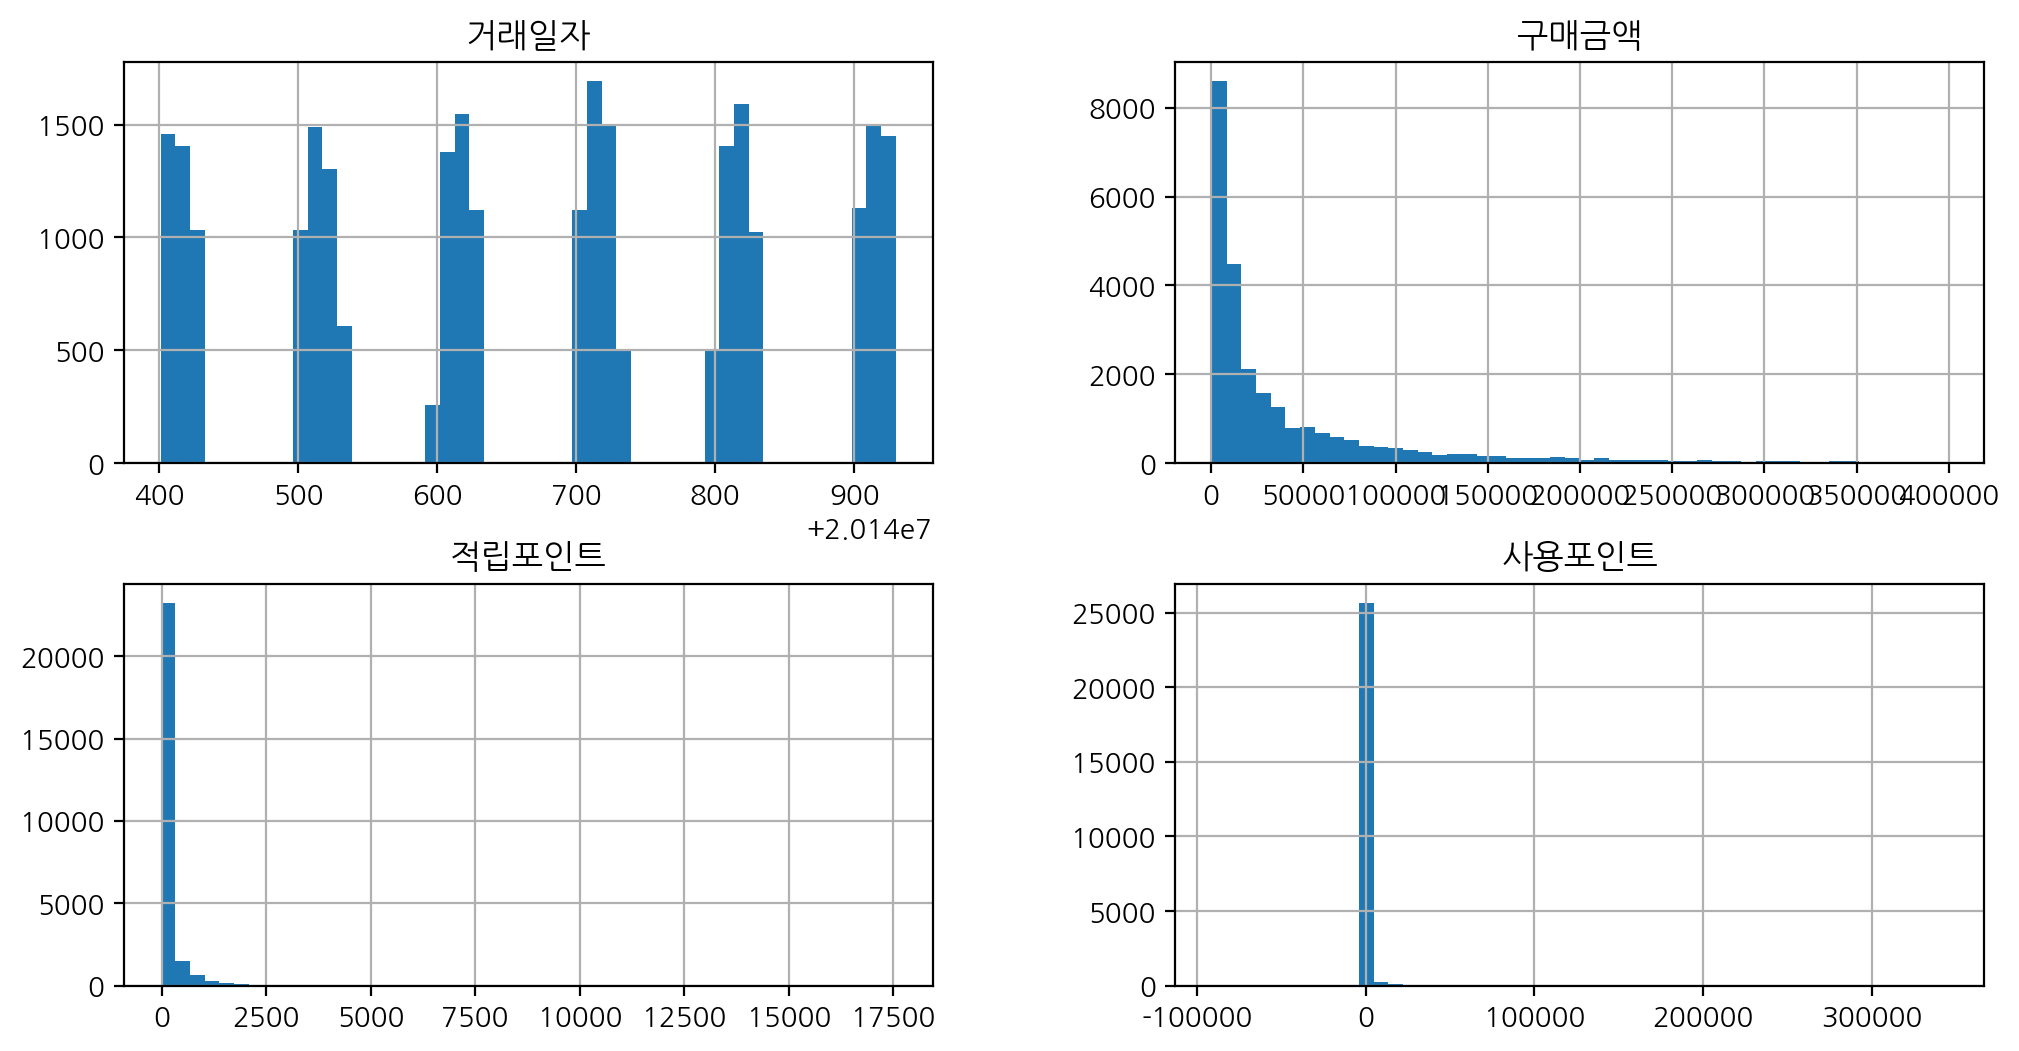

In [34]:
store_data.hist(bins = 50, figsize = (12, 6));